#   Starting to take a gander at the QC
It's not *too* different from CTD files
Big problem: No source engineering units. Might be hard to QC a lot of it at the source.

Check out [UK data ethics framework](https://www.gov.uk/government/publications/data-ethics-framework) regarding generic filters and modifications to data. ODF methodology may not fit the VOTO ethos (ODF never wrote it down or definited it).

##  Pulling data
Get it from here: https://erddap.observations.voiceoftheocean.org/erddap/info/index.html?page=1&itemsPerPage=1000
In this case, I grabbed:
* [nrt_SEA078_M41](https://erddap.observations.voiceoftheocean.org/erddap/files/nrt_SEA078_M41/)
    * nrt = near-real time
    * SEA078 = glider instrumentation serial number (the NAV is something else)
    * M41 = deployment or mission number
* [delayed_SEA078_M41](https://erddap.observations.voiceoftheocean.org/erddap/files/delayed_SEA078_M41/)

TODO: Get a linter set up. Ruff

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
# import cotede   #   Environment specific check. Possibly remove this dependency as it hasn\t been maintained since 2023,
import pyglider #   From the pyglider project - read through the API at some point

In [2]:
# Word of warning: The delayed file is 100x the size of the near real time file.
nrt = xr.open_dataset('data/mission_timeseries.nc')
nrt = nrt.isel(time=slice(200, None))   # Cut out the first 200 points to ignore deployment noise
print(nrt)

<xarray.Dataset> Size: 9MB
Dimensions:                        (time: 28894)
Coordinates:
  * time                           (time) datetime64[ns] 231kB 2025-08-27T08:...
    latitude                       (time) float64 231kB ...
    longitude                      (time) float64 231kB ...
    depth                          (time) float64 231kB ...
Data variables: (12/63)
    ad2cp_beam1_cell_number1       (time) float32 116kB ...
    ad2cp_beam2_cell_number1       (time) float32 116kB ...
    ad2cp_beam3_cell_number1       (time) float32 116kB ...
    ad2cp_beam4_cell_number1       (time) float32 116kB ...
    ad2cp_heading                  (time) float32 116kB ...
    ad2cp_pitch                    (time) float32 116kB ...
    ...                             ...
    potential_temperature_qc       (time) float32 116kB ...
    phycocyanin_qc                 (time) float32 116kB ...
    vertical_distance_to_seafloor  (time) float32 116kB ...
    profile_index                  (time) int6

In [35]:
nrt.attrs

{'AD2CP': "{'calibration_date': '2022-07-18', 'factory_calibrated': 'Yes', 'long_name': 'Nortek Glider1000 AD2CP', 'make': 'Nortek', 'make_model': 'Nortek AD2CP', 'model': 'AD2CP', 'serial': '104646'}",
 'Conventions': 'CF-1.8',
 'Metadata_Conventions': 'CF-1.6, Unidata Dataset Discovery v1.0',
 'acknowledgement': 'This study used data collected and made freely available by Voice of the Ocean Foundation (https://voiceoftheocean.org) accessed from https://erddap.observations.voiceoftheocean.org/erddap/index.html',
 'basin': 'Eastern Gotland Basin, Northern Baltic Proper',
 'cdm_data_type': 'Trajectory',
 'comment': ' Glider flew with zt/zs=2 and alt=2 for full mission. ',
 'contributor_name': 'Callum Rollo, Louise Biddle, Olle Glader, Aleksandra Mazur, Marcus Melin, Gunnar Johnsson, Andrew Birkett, Michaela Edwinson, Anna Willstrand Wranne, Adele Maciute',
 'contributor_role': 'Data Processor, PI, Head of Operations, Glider Technician, Glider Technician, Glider Technician, Glider Techni

In [3]:
var = 'temperature'

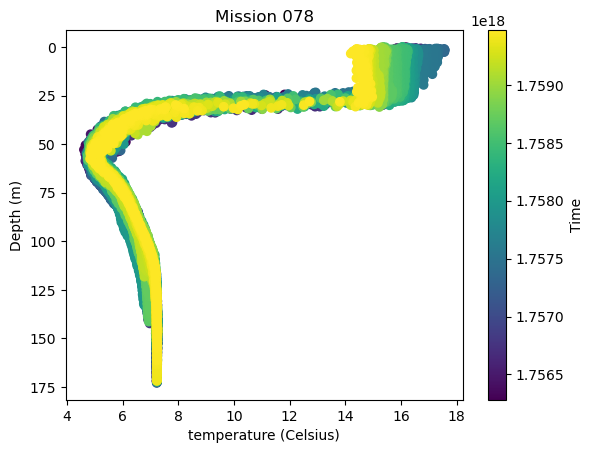

In [4]:
plt.scatter(nrt[var], nrt.depth, c=nrt.time, cmap='viridis')
plt.gca().invert_yaxis()
plt.title('Mission 078')
plt.xlabel(f"{var} ({nrt[var].attrs.get('units', 'N/A')})")
plt.ylabel('Depth (m)')
plt.colorbar(label='Time')

In [5]:
list(nrt.variables) # Open in new window

['ad2cp_beam1_cell_number1',
 'ad2cp_beam2_cell_number1',
 'ad2cp_beam3_cell_number1',
 'ad2cp_beam4_cell_number1',
 'ad2cp_heading',
 'ad2cp_pitch',
 'ad2cp_pressure',
 'ad2cp_roll',
 'ad2cp_time',
 'altimeter',
 'backscatter',
 'chlorophyll',
 'conductivity',
 'downwelling_PAR',
 'internal_temperature_PAR',
 'nav_resource',
 'oxygen_ad_counts',
 'oxygen_concentration',
 'oxygen_led_counts',
 'phycocyanin',
 'pressure',
 'temperature_oxygen',
 'angular_cmd',
 'angular_pos',
 'ballast_cmd',
 'ballast_pos',
 'dead_reckoning',
 'declination',
 'desired_heading',
 'dive_num',
 'heading',
 'internal_pressure',
 'internal_temperature',
 'linear_cmd',
 'linear_pos',
 'nav_state',
 'pitch',
 'roll',
 'salinity',
 'security_level',
 'temperature',
 'voltage',
 'distance_over_ground',
 'potential_density',
 'density',
 'potential_temperature',
 'pressure_qc',
 'depth_qc',
 'temperature_qc',
 'salinity_qc',
 'conductivity_qc',
 'oxygen_concentration_qc',
 'chlorophyll_qc',
 'longitude_qc',
 'lat

In [6]:
nrt.variables

Frozen({'ad2cp_beam1_cell_number1': <xarray.Variable (time: 28894)> Size: 116kB
[28894 values with dtype=float32]
Attributes:
    long_name:            glider beam 1 measure from AD2CP in cell 1
    source:               AD2CP_V1_CN1
    standard_name:        platform_beam1_measure_ad2cp_cell1
    units:                m s-1
    comment:               
    accuracy:              
    precision:             
    platform:             platform
    resolution:            
    ancillary_variables:   , 'ad2cp_beam2_cell_number1': <xarray.Variable (time: 28894)> Size: 116kB
[28894 values with dtype=float32]
Attributes:
    long_name:            glider beam 2 measure from AD2CP in cell 1
    source:               AD2CP_V2_CN1
    standard_name:        platform_beam1_measure_ad2cp_cell1
    units:                m s-1
    comment:               
    accuracy:              
    precision:             
    platform:             platform
    resolution:            
    ancillary_variables:   , 'a

In [7]:
for name, varx in nrt.variables.items():
    print(f"{name}:\t {varx.attrs.get('long_name', 'No long_name attribute')}:\t ({varx.attrs.get('units', 'N/A')})")

ad2cp_beam1_cell_number1:	 glider beam 1 measure from AD2CP in cell 1:	 (m s-1)
ad2cp_beam2_cell_number1:	 glider beam 2 measure from AD2CP in cell 1:	 (m s-1)
ad2cp_beam3_cell_number1:	 glider beam 3 measure from AD2CP in cell 1:	 (m s-1)
ad2cp_beam4_cell_number1:	 glider beam 4 measure from AD2CP in cell 1:	 (m s-1)
ad2cp_heading:	 glider heading angle from AD2CP:	 (degrees)
ad2cp_pitch:	 glider pitch angle from AD2CP:	 (degrees)
ad2cp_pressure:	 glider pressure from AD2CP:	 (dbar)
ad2cp_roll:	 glider roll angle from AD2CP:	 (degrees)
ad2cp_time:	 AD2CP recorded time:	 (N/A)
altimeter:	 glider altimeter reading:	 (N/A)
backscatter:	 700 nm wavelength backscatter:	 (m-1 sr-1)
chlorophyll:	 470 nm wavelength chlorophyll:	 (mg m-3)
conductivity:	 water conductivity:	 (mS cm-1)
downwelling_PAR:	 Downwelling PAR (Photosynthetically Active Radiation) in range 400-700 nm:	 (μE cm-2 s-1)
internal_temperature_PAR:	 Sensor internal temperature:	 (Celsius)
nav_resource:	 nav resource:	 (None)
o

In [8]:
def property_property(ds, var1, var2, var3=None):
    if var3 is not None:
        sc = plt.scatter(ds[var1], ds[var2], c=ds[var3], cmap='viridis')
        cmaplabel = str(var3 + ": " + ds[var3].attrs.get('units', 'N/A'))
        plt.colorbar(sc, label=cmaplabel)
    else:
        plt.scatter(ds[var1], ds[var2])
    plt.gca().invert_yaxis()
    plt.xlabel(f"{var1}: {ds[var1].attrs.get('units', 'N/A')}")
    plt.ylabel(f"{var2}: {ds[var2].attrs.get('units', 'N/A')}")

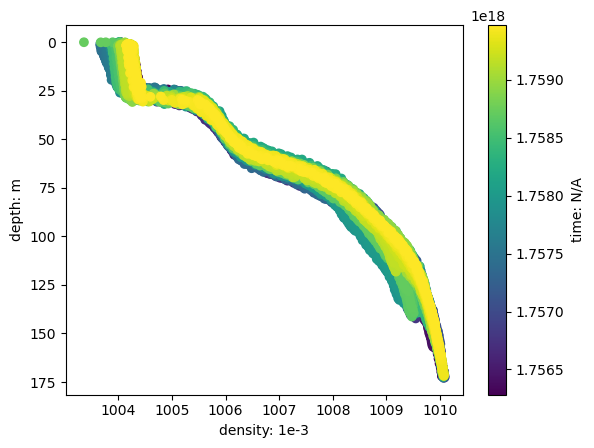

In [9]:
property_property(nrt, 'density', 'depth', 'time')

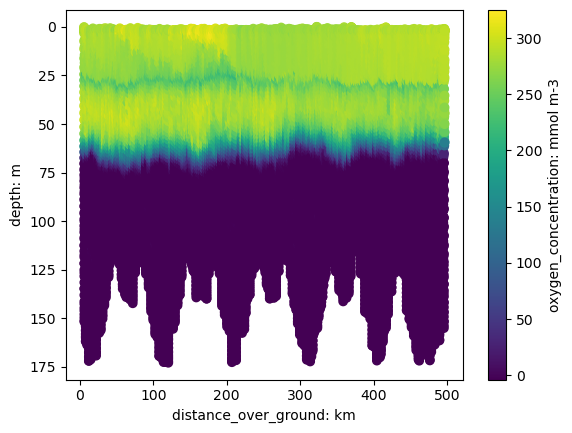

In [10]:
property_property(nrt, 'distance_over_ground', 'depth', 'oxygen_concentration')

...aaaand let's animate it

In [11]:
len(nrt.time)

28894

temperature


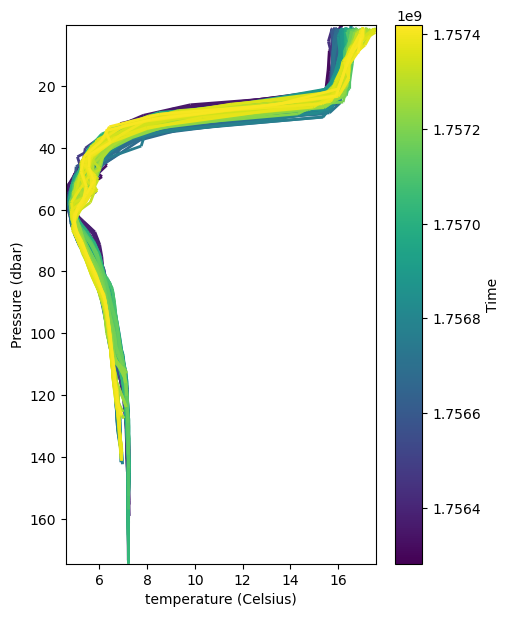

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.collections import LineCollection
import matplotlib.cm as cm
import matplotlib.colors as mcolors

#   1. Define dimensions
#   2. Have a moving point
#   3. Have a trail that follows the point, colored by time (segments)
#   4. Iterate over time with timestamp as text
#   5. Save animation as mp4 for speed

print(var)  # Confirm it's temperature, could be whatever
t = nrt[var].values
p = nrt["pressure"].values
time = nrt["time"].values.astype("datetime64[s]").astype(float)  # numeric for colormap
step = 2
t = t[:10000:step]
p = p[:10000:step]
time = time[:10000:step]

fig, ax = plt.subplots(figsize=(5, 7))


point, = ax.plot([], [], marker="o", markersize=6, lw=0)
# Shape = (N-1, 2, 2) → segment i goes from (t[i], p[i]) to (t[i+1], p[i+1])
segments = np.stack([np.column_stack([t[:-1], p[:-1]]),
                     np.column_stack([t[1:],  p[1:]])], axis=1)

# Normalize time to 0–1 for color mapping
norm = mcolors.Normalize(vmin=np.nanmin(time), vmax=np.nanmax(time))
cmap = cm.viridis

# LineCollection for the trail
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(time[:-1])
lc.set_linewidth(2)

trail = ax.add_collection(lc)

ax.set_xlabel(f"{var} ({nrt[var].attrs.get('units', 'N/A')})")
ax.set_ylabel("Pressure (dbar)")
ax.set_xlim(np.nanmin(t), np.nanmax(t))
ax.set_ylim(np.nanmin(p), np.nanmax(p))
ax.invert_yaxis()
cbar = fig.colorbar(lc, ax=ax)
cbar.set_label("Time")

time_text = ax.text(0.05, 0.95, "", transform=ax.transAxes, va="top")

def init(): # Blank to start with> point, lc, time_text
    point.set_data([], [])
    lc.set_segments([])     # No trail at beginning
    time_text.set_text("")
    return point, trail, time_text


def update(frame):
    point.set_data([t[frame]], [p[frame]])  # Update glider position

    if frame > 1:   # Draw the glider trail from previous frame to now
        lc.set_segments(segments[:frame-1])
        lc.set_array(time[:frame-1])
    else:
        lc.set_segments([])

    time_text.set_text(str(nrt["time"].values[frame]))  # Time text

    return point, trail, time_text


ani = FuncAnimation(
    fig, update, frames=len(t), init_func=init,
    blit=False, interval=15
)   # Higher interval = slower animation

plt.show()
#   Warning: 3m 42.7s last check
ani.save("glider_TP_animation.mp4", writer="ffmpeg", dpi=60)

And to animate by profiles being layered atop one another

Probably faster

In [13]:
np.unique(nrt["dive_num"].to_numpy())

array([  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  37,  41,
        45,  49,  53,  57,  61,  65,  69,  73,  77,  81,  85,  89,  93,
        97, 101, 105, 109, 113, 117, 121, 125, 129, 133, 137, 141, 145,
       149, 153, 157, 161, 165, 168, 171, 174, 177, 180, 183, 186, 189,
       198, 201, 205, 209, 213, 221, 225, 229, 233, 237, 241, 245, 249,
       253, 257, 261, 262, 266, 270, 274, 278, 282, 286, 290, 294, 298,
       302, 306, 310, 313, 316, 319, 322, 325, 334, 337, 343, 347, 351,
       355, 359, 363, 367, 371, 375, 379, 383, 387, 391, 395, 399, 403,
       407, 411, 415, 419, 423, 427, 431, 435, 439, 443, 447, 451, 454,
       455, 459, 460, 463, 467, 471, 474, 475, 479, 483, 486, 489, 492,
       495, 498, 501, 504, 507, 510, 513, 516, 519, 520, 521, 525, 529,
       533, 537, 541, 545, 549, 553, 557, 565, 569, 573, 577, 581, 585,
       589, 593, 597, 598, 602, 606, 610, 611, 612, 613, 621, 625, 629,
       633, 637, 641, 645, 646, 649, 652, 655, 658, 661, 664, 66

In [14]:
np.diff(np.unique(nrt["dive_num"].to_numpy()))

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 9, 3, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 9, 3, 6,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 1, 4, 1, 3, 4, 4, 3, 1, 4, 4, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4,
       4, 4, 4, 4, 1, 4, 4, 4, 1, 1, 1, 8, 4, 4, 4, 4, 4, 4, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 4, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3,
       3, 3, 1, 6, 3, 3, 3, 8, 3, 4, 3, 3, 3, 1, 1, 1, 1, 1, 1])

...interesting. I wonder why the `dive_num` doesn't iterate evenly...

Clarification with Callum: It's because I'm looking at the near-real time data.
* When the glider is in the water, it has to preserve as much battery as possible and not get hit by ships. For that reason, it spends as little time at the surface as possible.
* If it isn't always at the surface sending data over iridium, it's recording multiple dives in a row.
* To save bandwidth, the glider only sends about 1MB of data, which is the most recent dive most of the time.
* 

In [15]:
#   Break the data up into profiles
df = nrt[["temperature", "pressure", "dive_num"]].to_dataframe().dropna()
groups = df.groupby("dive_num")
profiles = []
for dive, grp in groups:
    T = grp["temperature"].values
    P = grp["pressure"].values
    profiles.append((dive, T, P))

/tmp/ipykernel_236319/666132962.py:13: UserWarning: Adding colorbar to a different Figure <Figure size 500x700 with 2 Axes> than <Figure size 500x700 with 2 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(lc, ax=ax)


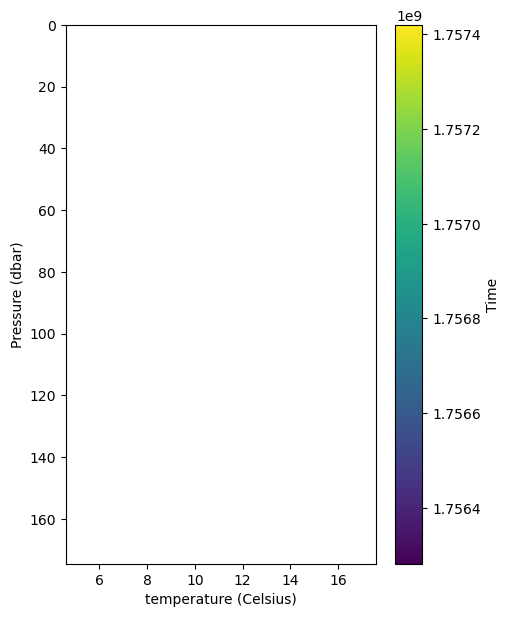

In [16]:
fig, ax = plt.subplots(figsize=(5, 7))
ax.set_xlabel(f"{var} ({nrt[var].attrs.get('units', 'N/A')})")
ax.set_ylabel("Pressure (dbar)")

#   Pretty axes
ax.set_xlim(np.nanmin(nrt["temperature"].values), np.nanmax(nrt["temperature"].values))
ax.set_ylim(np.nanmin(nrt["pressure"].values), np.nanmax(nrt["pressure"].values))

lines = []
title = ax.text(0.05, 0.95, "", transform=ax.transAxes, va="top")

ax.invert_yaxis()
cbar = fig.colorbar(lc, ax=ax)
cbar.set_label("Time")

cmap = cm.viridis
def update(i):
    dive_num, T, P = profiles[i]
    color = cmap(i / len(profiles))
    line, = ax.plot(T, P, lw=1.5, color=color)
    lines.append(line)
    title.set_text(f"Dive {dive_num}")
    return [line, title]

ani = FuncAnimation(
    fig, update, frames=len(profiles),
    blit=False, interval=200
)

plt.show()
#   11.4s last check
ani.save("glider_animation.mp4", writer="ffmpeg", dpi=60)


Look at the QC flags
* Take a look at the quality control convention.
* Callum left a lot of stuff in the final comment, which primarily comes from wanting to be transparent.

In [17]:
nrt['temperature_qc'].attrs

{'ioos_qc_module': 'qartod',
 'quality_control_conventions': 'IOOS QARTOD standard flags',
 'quality_control_set': np.int64(1),
 'valid_min': np.int8(1),
 'valid_max': np.int8(9),
 'flag_values': array([1, 2, 3, 4, 9]),
 'flag_meanings': 'GOOD, UNKNOWN, SUSPECT, FAIL, MISSING',
 'long_name': 'quality control flags for water temperature',
 'standard_name': 'sea_water_temperature_flag',
 'comment': 'Quality control flags from IOOS QC QARTOD https://github.com/ioos/ioos_qc Version: 2.1.0. Using config: [<Call stream_id=temperature function=qartod.gross_range_test(suspect_span=[0, 30], fail_span=[-2.5, 40])>, <Call stream_id=temperature function=qartod.spike_test(suspect_threshold=2.0, fail_threshold=6.0)>, <Call stream_id=temperature function=qartod.location_test(bbox=[7, 53, 26, 65])>].  Threshold values from EuroGOOS DATA-MEQ Working Group (2010) Recommendations for in-situ data Near Real Time Quality Control [Version 1.2]. EuroGOOS, 23pp. DOI http://dx.doi.org/10.25607/OBP-214.'}

In [20]:
nrt[f"{var}_qc"].attrs

{'ioos_qc_module': 'qartod',
 'quality_control_conventions': 'IOOS QARTOD standard flags',
 'quality_control_set': np.int64(1),
 'valid_min': np.int8(1),
 'valid_max': np.int8(9),
 'flag_values': array([1, 2, 3, 4, 9]),
 'flag_meanings': 'GOOD, UNKNOWN, SUSPECT, FAIL, MISSING',
 'long_name': 'quality control flags for water temperature',
 'standard_name': 'sea_water_temperature_flag',
 'comment': 'Quality control flags from IOOS QC QARTOD https://github.com/ioos/ioos_qc Version: 2.1.0. Using config: [<Call stream_id=temperature function=qartod.gross_range_test(suspect_span=[0, 30], fail_span=[-2.5, 40])>, <Call stream_id=temperature function=qartod.spike_test(suspect_threshold=2.0, fail_threshold=6.0)>, <Call stream_id=temperature function=qartod.location_test(bbox=[7, 53, 26, 65])>].  Threshold values from EuroGOOS DATA-MEQ Working Group (2010) Recommendations for in-situ data Near Real Time Quality Control [Version 1.2]. EuroGOOS, 23pp. DOI http://dx.doi.org/10.25607/OBP-214.'}

{'long_name': 'glider altimeter reading', 'source': 'Altitude', 'standard_name': 'glider_altimeter_reading', 'comment': ' ', 'accuracy': ' ', 'precision': ' ', 'platform': 'platform', 'resolution': ' ', 'ancillary_variables': ' '}
                  0
count  28894.000000
mean       3.212869
std        7.748569
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       33.184429


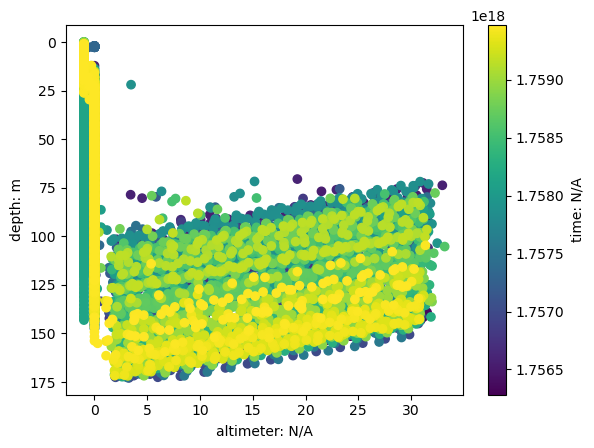

In [27]:
print(nrt["altimeter"].attrs)
print(pd.DataFrame(nrt["altimeter"]).describe())
property_property(nrt, 'altimeter', 'depth', 'time')

{'long_name': 'vertical distance from glider to seafloor', 'source': 'Altitude', 'standard_name': 'vertical_distance_to_seafloor', 'units': 'm', 'comment': 'Distance to the seafloor is calculated from the glider altimeter (see altimeter variable), which is oriented at 20 degrees from the vertical such that it is vertical when the glider is pitched downwards at 20 degrees.', 'accuracy': ' ', 'precision': ' ', 'platform': 'platform', 'resolution': ' ', 'ancillary_variables': ' '}
                 0
count  6000.000000
mean     14.416197
std       7.770989
min       0.004363
25%       7.742258
50%      14.245095
75%      20.904999
max      30.931475


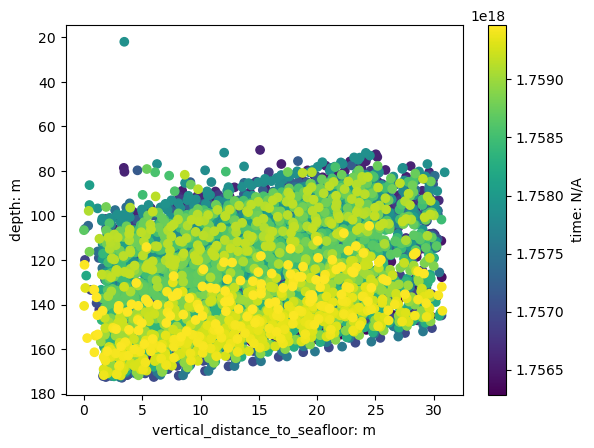

In [26]:
print(nrt["vertical_distance_to_seafloor"].attrs)
print(pd.DataFrame(nrt["vertical_distance_to_seafloor"]).describe())
property_property(nrt, 'vertical_distance_to_seafloor', 'depth', 'time')

In [28]:
nrt.profile_index

<xarray.DataArray 'profile_index' (time: 28894)> Size: 231kB
[28894 values with dtype=int64]
Coordinates:
  * time       (time) datetime64[ns] 231kB 2025-08-27T08:08:01.744999936 ... ...
    latitude   (time) float64 231kB 58.11 58.11 58.11 ... 58.12 58.12 58.12
    longitude  (time) float64 231kB 19.79 19.79 19.79 ... 19.78 19.78 19.79
    depth      (time) float64 231kB 1.67 1.663 1.654 1.671 ... 3.404 1.968 1.989
Attributes:
    long_name:  profile index
    units:      1
    sources:    pressure, time, dive_num

In [34]:
nrt.profile_index.values[0:10]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [29]:
nrt.profile_num

<xarray.DataArray 'profile_num' (time: 28894)> Size: 231kB
[28894 values with dtype=int64]
Coordinates:
  * time       (time) datetime64[ns] 231kB 2025-08-27T08:08:01.744999936 ... ...
    latitude   (time) float64 231kB 58.11 58.11 58.11 ... 58.12 58.12 58.12
    longitude  (time) float64 231kB 19.79 19.79 19.79 ... 19.78 19.78 19.79
    depth      (time) float64 231kB 1.67 1.663 1.654 1.671 ... 3.404 1.968 1.989
Attributes:
    long_name:  profile number
    units:      1
    sources:    pressure, time, dive_num

In [30]:
nrt.dive_num

<xarray.DataArray 'dive_num' (time: 28894)> Size: 231kB
array([  3,   3,   3, ..., 790, 790, 790], shape=(28894,))
Coordinates:
  * time       (time) datetime64[ns] 231kB 2025-08-27T08:08:01.744999936 ... ...
    latitude   (time) float64 231kB 58.11 58.11 58.11 ... 58.12 58.12 58.12
    longitude  (time) float64 231kB 19.79 19.79 19.79 ... 19.78 19.78 19.79
    depth      (time) float64 231kB 1.67 1.663 1.654 1.671 ... 3.404 1.968 1.989
Attributes:
    long_name:            glider dive number from original SeaExplorer filename
    source:               fnum
    standard_name:        dive_number
    units:                None
    comment:               
    accuracy:              
    precision:             
    platform:             platform
    resolution:            
    ancillary_variables:

In [31]:
nrt.dead_reckoning

<xarray.DataArray 'dead_reckoning' (time: 28894)> Size: 116kB
[28894 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 231kB 2025-08-27T08:08:01.744999936 ... ...
    latitude   (time) float64 231kB 58.11 58.11 58.11 ... 58.12 58.12 58.12
    longitude  (time) float64 231kB 19.79 19.79 19.79 ... 19.78 19.78 19.79
    depth      (time) float64 231kB 1.67 1.663 1.654 1.671 ... 3.404 1.968 1.989
Attributes:
    long_name:            dead reckoning
    source:               DeadReckoning
    standard_name:        dead_reckoning
    units:                None
    comment:               
    accuracy:              
    precision:             
    platform:             platform
    resolution:            
    ancillary_variables: